In [539]:
import os
import glob 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import extract_functions as fn

# Jupyter specific autoreloading for external functions (in case changes are made)
%load_ext autoreload
%autoreload
# %matplotlib widget

# Mac or Windows
#---------------------------------------------------------------------------
Fmac= '/Users/dominicburrows'
Fwin = 'C:/Users/Dominic'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Extract cell data

In [572]:
# Define computer and data location
#---------------------------------------------------------------------------
Fs2p = Fmac + '/' + 'Documents/Imaging' + '/' + '190206_wt_gc6s_15%/F2_p20_suite2p'
Fdrop = Fmac + '/' + 'Dropbox/PhD/suite2p data/dom_data'

#Extract all active cells from suite2p plane data
#--------------------------------------------------------------------
Fish  = fn.fish_load(Fs2p, Fdrop)

Found 10 planes
Found 13905 cells
Saved trace and coordinates in dom_data


# Filter traces

In [593]:
# Define trace and coord file location
#---------------------------------------------------------------------------
Ftrace = Fdrop + '/' + '190206_wt_F2_p2' +'_com_signal.npy'
Fcoord = Fdrop + '/' + '190206_wt_F2_p2' + '_com_coord.npy'
Fish = {'Trace':np.load(Ftrace), 'Coord': np.load(Fcoord)}

# Apply filter: band pass and linear/highpass
#---------------------------------------------------------------------------
ffilt = fn.fish_filter(Fish['Trace'], highcut = 500, lowcut = 0)
Fish.update({'Filt':ffilt})
#ffilt2 = fn.fish_low(Fish['Filt'], fun = 'filt')
#Fish.update({'Filt2':ffilt2})

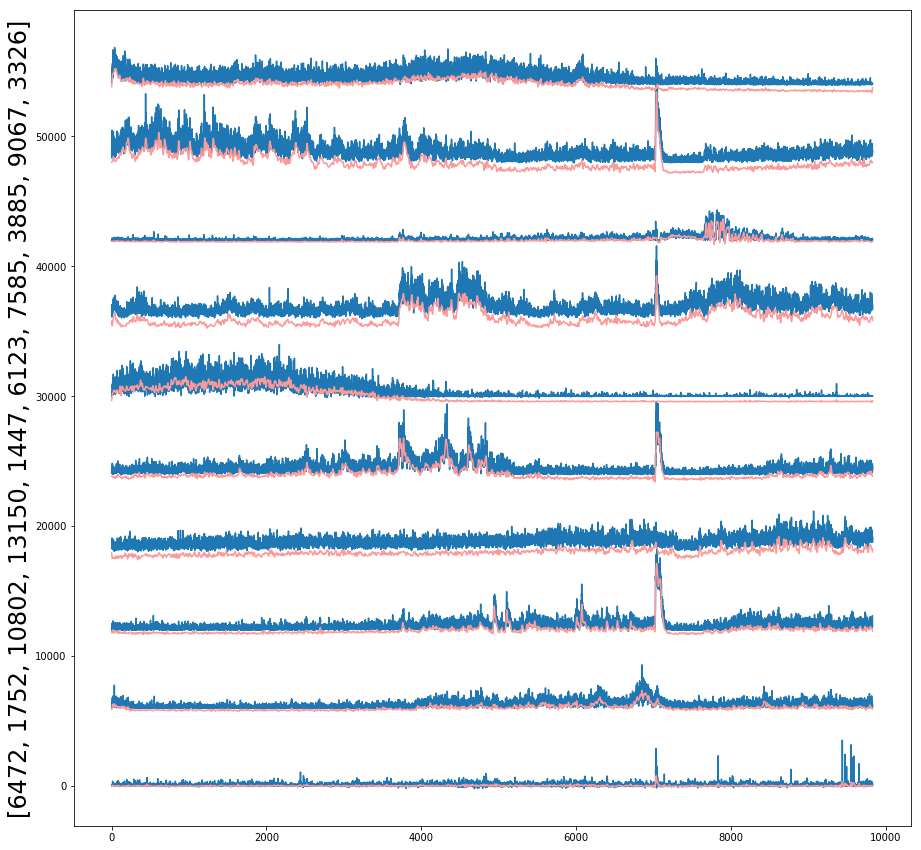

In [600]:
# Plot raw and filtered traces
#---------------------------------------------------------------------------
import random as rand
nplt  = 10
rdm = rand.sample(range(0, Fish['Trace'].shape [0]), nplt)

# Define plotting regime - random or ordered [nplt:,:]
#---------------------------------------------------------------------------
d = Fish['Trace'][rdm]
d2 = Fish['Filt'][rdm]

cm    = plt.get_cmap("Paired")
fig, ax = plt.subplots(figsize=(15,15))
ax.set_ylabel(rdm, size=24)

for i in range(nplt):
    plt.plot(d[i,:] + 6000*i, c=cm(1))
    plt.plot(d2[i,:] + 6000*i, c=cm(4))

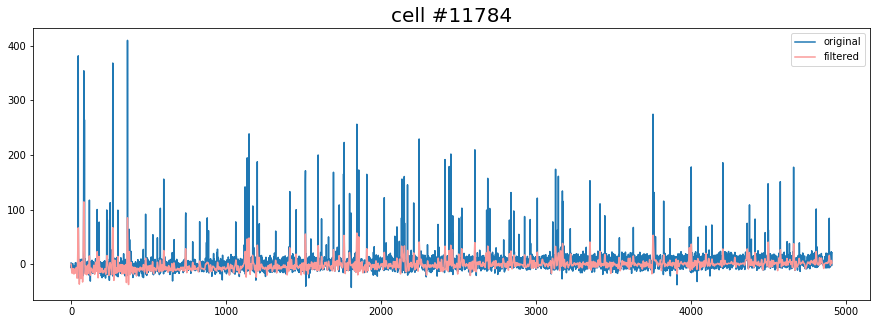

In [10]:
# Check individual cells, alter filter accordingly
#--------------------------------------------------------------------------
cell = 11784
d = Fish['Trace'][cell,:]
d2 = Fish['Filt'][cell,:]
#d3 = Fish['Filt2'][cell,:]

cm    = plt.get_cmap("Paired")
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('cell #' + str(cell), size = 20)

ax.plot(d, c=cm(1), label = 'original')
ax.plot(d2, c=cm(4), label = 'filtered')
#ax.plot(d3, c=cm(8), label = 'linear')
ax.legend(loc = 'upper right')

plt.show()

# Normalise

In [601]:
dat = Fish['Filt']
def fish_norm(dat):   
    return(dat/np.mean(dat))

norm = np.apply_along_axis(fish_norm, 1, (dat + 3000))

# Remove noisy cells 

In [602]:
# Define size of sliding window in frames to calculate max of mins
#---------------------------------------------------------------------------
fmxmn = fn.fish_max_min(norm, window = 9)
Fish.update({'Maxmin':fmxmn})

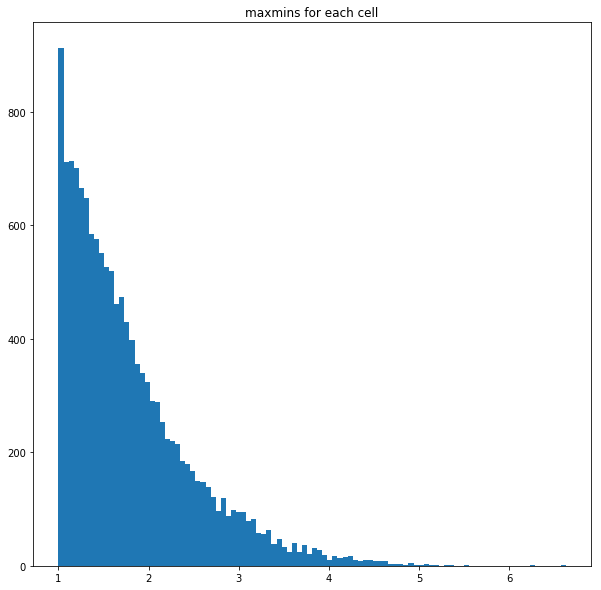

In [603]:
# View histogram of all maxmins for each cell
#---------------------------------------------------------------------------
plt.figure(figsize=(10,10))
plt.hist(Fish['Maxmin'], bins=100, range=(min(Fish['Maxmin']),max(Fish['Maxmin'])), rwidth = 10)

plt.title('maxmins for each cell')
plt.show()

In [606]:
# Set threshold and remove noisy cells
#---------------------------------------------------------------------------------------------------
ffin = fn.fish_thresh(Fish['Trace'], Fish['Coord'], Fish['Maxmin'], Ftrace, Fdrop, thresh = 1.1)
Fish.update({'Realcell': ffin[1], 'Realtrace': ffin[0], 'Noisecell': ffin[3], 'Noisetrace': ffin[2]})

Kept 12423 cells
Filtered 1482 cells


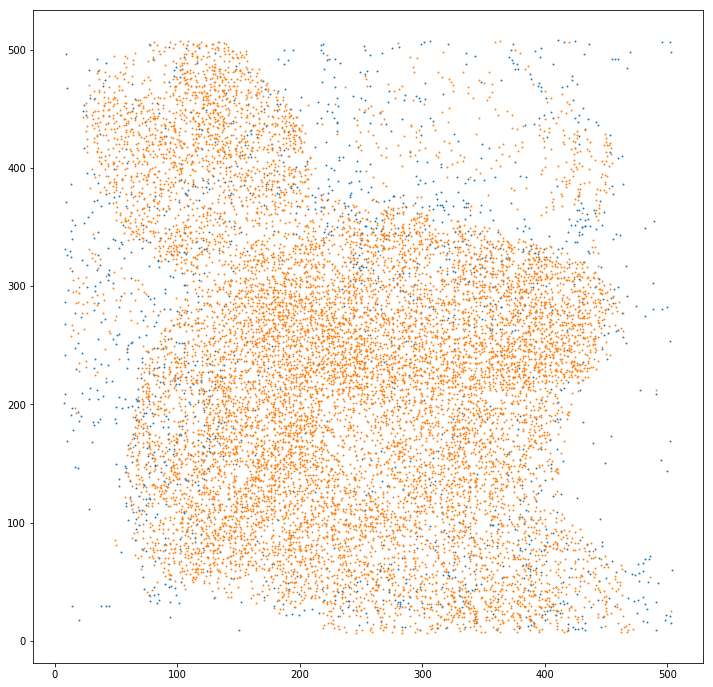

In [607]:
# Plot kept and excluded cells - adjust threshold
#---------------------------------------------------------------------------
plt.figure(figsize= (12,12))

plt.scatter(Fish['Noisecell'][:,0], Fish['Noisecell'][:,1], s=0.8)
plt.scatter(Fish['Realcell'][:,0], Fish['Realcell'][:,1], s=0.8)

In [1]:
# Plot raw excluded cell traces - adjust threshold
#---------------------------------------------------------------------------
import random as rand
nplt  = 5
rdm = rand.sample(range(0, Fish['Realtrace'].shape [0]), nplt)

f = Fish['Realtrace'][rdm]
#f2 = Fish['Noisetrace'][rdm]
cm    = plt.get_cmap("Paired")
fig, ax = plt.subplots(figsize=(15,15))
ax.set_ylabel(rdm, size=50)
for i in range(nplt):
    plt.plot(f[i,:] + 6000*i, c=cm(1))


NameError: name 'Fish' is not defined

<Figure size 1440x14400 with 0 Axes>

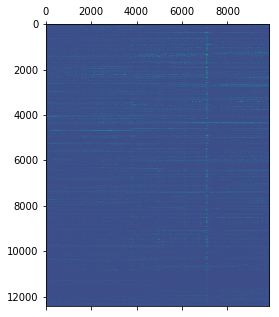

In [608]:
# Plot example module traces
#---------------------------------------------------------------------------------------
plt.figure(figsize=(20,200))
plt.matshow(Fish['Realtrace'])